In [1]:
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import torch
import torchvision.models as models
from utils import model_imgnet
from torch.utils.data import DataLoader
from utils import CustomDataset
from torch.utils.data import Dataset, DataLoader
import glob
from utils import loader_imgnet, model_imgnet, evaluate
from attack3 import uap_toep

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
model = model_imgnet('vgg19').eval()
directory = '/data/yyt/project1/data/avgpix/mean'
dataset = CustomDataset(directory)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)
# loader = loader_imgnet(dir_data, 48, batch_size, model_dimension, center_crop)

modelname = 'vgg19'
uap_toep(model,modelname ,data_loader, [0,2,5,7,10, 12,14,16,19,21,23,25,28,30,32,34,38,41,44]  , optimizer=None, scheduler=None, uap="/data/yyt/project1/data/uaps/uap_init1.pth", eps=10, epochs=1000,batch_size=1)

/data/anaconda3/envs/MVSS/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/anaconda3/envs/MVSS/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loading complete.
Iteration 49:loss -7428.376187061511
Iteration 49:loss -7629.2739376654135
Iteration 99:loss -8106.115703322599
Iteration 99:loss -8309.552068578425
Iteration 149:loss -8719.769244030083
Iteration 149:loss -8824.67508539676
Iteration 199:loss -9175.712456577936
Iteration 199:loss -9322.67811552973
Iteration 249:loss -9616.430456703249
Iteration 249:loss -9754.684888620366
Iteration 299:loss -9983.145885519045
Iteration 299:loss -10118.978026820438
Iteration 349:loss -10235.433495096733
Iteration 349:loss -10389.344798754495
Iteration 399:loss -10416.300045964212
Iteration 399:loss -10596.091223548485
Iteration 449:loss -10536.886446628663
Iteration 449:loss -10724.949268260341
Iteration 499:loss -10610.96117573586
Iteration 499:loss -10801.275460378469
Iteration 549:loss -10652.714737700173
Iteration 549:loss -10848.7874772208
Iteration 599:loss -10682.388131472662
Iteration 599:loss -10877.31317793676
Iteration 649:loss -10698.044277705865
Iteration 649:loss -1

(tensor([[[[ 0.0392,  0.0392,  0.0392,  ...,  0.0340,  0.0160, -0.0392],
           [ 0.0392,  0.0392,  0.0392,  ...,  0.0359,  0.0392, -0.0392],
           [ 0.0392,  0.0392,  0.0392,  ..., -0.0135,  0.0373, -0.0392],
           ...,
           [-0.0392, -0.0392, -0.0392,  ...,  0.0392, -0.0392,  0.0392],
           [-0.0392, -0.0392, -0.0392,  ..., -0.0392, -0.0392,  0.0392],
           [-0.0392, -0.0392, -0.0392,  ...,  0.0392,  0.0392, -0.0392]],
 
          [[ 0.0392,  0.0392,  0.0278,  ..., -0.0392, -0.0392, -0.0392],
           [ 0.0392, -0.0392, -0.0392,  ..., -0.0392, -0.0392, -0.0392],
           [ 0.0345, -0.0351, -0.0392,  ...,  0.0392, -0.0392, -0.0392],
           ...,
           [-0.0392,  0.0392,  0.0392,  ..., -0.0392, -0.0392,  0.0392],
           [-0.0392,  0.0392,  0.0392,  ..., -0.0392, -0.0392,  0.0392],
           [ 0.0392, -0.0392, -0.0392,  ...,  0.0392,  0.0392, -0.0392]],
 
          [[ 0.0392,  0.0392,  0.0392,  ...,  0.0392,  0.0392,  0.0392],
           [ 

In [8]:
import os
import sys
import torch
import argparse
import datetime

# Check if running in a Jupyter notebook
def in_notebook():
    try:
        from IPython import get_ipython
        return get_ipython() is not None
    except ImportError:
        return False

sys.path.append(os.path.realpath('..'))

from utils import loader_imgnet, model_imgnet, evaluate

def main(args):
    print(args)
    DEVICE = torch.device("cuda:0")
    time1 = datetime.datetime.now()
    dir_data = args.data_dir
    dir_uap = args.uaps_save
    batch_size = args.batch_size
    model_dimension = 299 if args.model_name == 'inception_v3' else 256
    center_crop = 299 if args.model_name == 'inception_v3' else 224
    loader = loader_imgnet(dir_data, 50000, batch_size, model_dimension, center_crop)

    model = model_imgnet(args.model_name)

    uap = torch.load(dir_uap)

    _, _, _, _, outputs, labels, y_outputs = evaluate(model, loader, uap=uap, batch_size=batch_size, DEVICE=DEVICE)
    print('true image Accuracy:', sum(y_outputs == labels) / len(labels))
    print('adversarial image Accuracy:', sum(outputs == labels) / len(labels))
    print('fooling rate:', 1 - sum(outputs == labels) / len(labels))
    print('fooling ratio:', 1 - sum(y_outputs == outputs) / len(labels))
    time2 = datetime.datetime.now()
    print("time consumed: ", time2 - time1)

def parse_arguments(argv):
    parser = argparse.ArgumentParser()
    parser.add_argument('--data_dir', default='/dataset/imagnet_val',
                        help='training set directory')
    parser.add_argument('--uaps_save', default='/data/yyt/project1/data/uaps/vgg19_norm10.pth',
                        help='UAPs save directory')
    parser.add_argument('--batch_size', type=int, default=1, help='Batch size for loading data')
    parser.add_argument('--model_name', default='vgg19', help='Name of the model to evaluate')

    return parser.parse_args(argv)

if __name__ == '__main__':
    if in_notebook():
        # Simulate command line arguments for Jupyter notebook
        argv = [
            '--data_dir', '/dataset/imagnet_val',
            '--uaps_save', '/data/yyt/project1/data/uaps/vgg19_norm10.pth',
            '--batch_size', '1',
            '--model_name', 'vgg19'
        ]
        main(parse_arguments(argv))
    else:
        main(parse_arguments(sys.argv[1:]))


Namespace(data_dir='/dataset/imagnet_val', uaps_save='/data/yyt/project1/data/uaps/vgg19_norm10.pth', batch_size=1, model_name='vgg19')
Model loading complete.
true image Accuracy: 0.71734
adversarial image Accuracy: 0.06386
fooling rate: 0.93614
fooling ratio: 0.92882
time consumed:  0:31:38.337116


In [ ]:
device

the inf_norm is tensor(10.0000, device='cuda:0', grad_fn=<NormBackward1>)


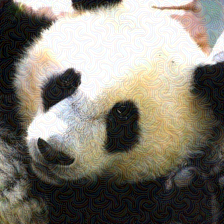

In [9]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms

x=torch.load("/data/yyt/project1/data/uaps/vgg19_norm10.pth").to(device)


#img
preprocess = transforms.Compose([transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()

])

image = Image.open("/data/yyt/project1/ILSVRC2012_val_00007942.JPEG")
tensor_image = preprocess(image).to(device)
tensor_image2 = preprocess(image)
#noise
tensor_image=tensor_image.to(device)+ x.squeeze()
error = (tensor_image.to(device) - tensor_image2.to(device) )*255

# print(inf_norm)
l_inf = torch.norm(error,float('inf'))
print("the inf_norm is",l_inf)


clipped_image_pil = torch.clamp(tensor_image,0,1,out=None)
clipped_image_pil = transforms.ToPILImage()(clipped_image_pil)
clipped_image_pil.show()

